- 랜덤포레스트
    - 앙상블 : 여러개의 모델을 결합해서 예측 성능을 높이는 기계학습 - 투표방식 대표적
    - 여러개의 결정트리 : 각각의 트리는 훈련데이터를 랜덤하게 사용 독립적으로 수행
    - 부트스트랩 샘플링 : 원본데이터에서 랜덤하게 샘플링하는데 중복을 허용
    - 특성 무작위 선택 : 노드를 분할할때 전체특성중에서 무작위로 선택된 일부 특성만 이용 최적의 분할을 찾는다- 모든 트리들이 서로 다양해 진다.
    - 장점 
        - 과적합 방지 : 여러개의 트리를 결합 개별 트리가 과적합되더라도 전체적으로 과적합이 감소
        - 정확도가 높다 : 다양한 트리
        - 특성 중요도 제공 : 모델 해석에 유용
        - 데이터 노이즈에 강함 : 랜덤샘플링, 무작위 특성 
    - 단점
        - 속도가 느리다
        - 모델 복잡성
        - 메모리 사용량 증가


In [3]:
# 데이터 확보
from sklearn.datasets import load_wine
wine = load_wine()
data = wine.data
target = wine.target
print(wine.target_names)
print(wine.DESCR)

['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:            

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,stratify=target,random_state=100)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)  # accuracy

0.9777777777777777

In [20]:
# 클래스 리포트
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



- 머신러닝은 데이터가 어떻게 섞이는가에 따라서 성능이 달라지며 이것을 일반화 하기에는 부족하므로
- 여러번 데이터 섞이는 것을 바꿔가면서(다양하게 섞어서) 성능을 내고 그 평균을 구한다.
- ex) 5번 수행하고평균
- --> 교차  검증

In [21]:
from sklearn.model_selection import cross_validate

In [22]:
help(cross_validate)  # 기본이 5 폴드

Help on function cross_validate in module sklearn.model_selection._validation:

cross_validate(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, return_indices=False, error_score=nan)
    Evaluate metric(s) by cross-validation and also record fit/score times.

    Read more in the :ref:`User Guide <multimetric_cross_validation>`.

    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.

    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.

    y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None
        The target variable to try to predict in the case of
        supervised learning.

    groups : array-like of shape (n_samples,), default=None
        Group labels for the sampl

In [25]:
scores = cross_validate(rfc, x_train,y_train,n_jobs=-1,return_train_score=True)  # n_jobs=-1 최대한트 리소를 이용해서 학습
scores['test_score'].mean()

np.float64(0.9849002849002849)

In [27]:
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier
model = GradientBoostingClassifier()
scores = cross_validate(model, x_train,y_train,n_jobs=-1,return_train_score=True)  # n_jobs=-1 최대한트 리소를 이용해서 학습
scores['test_score'].mean()

np.float64(0.9014245014245013)

앙상블
    - 약한 학습기
        - 성능이 겨우 맞출정도로 약한 모델을 만듦 정확도가 랜덤추측보다 약간 좋은 모델  : 주로 단순한 모델
        - 결합하면 성능이 향상
        - ex) 결정트리에서 max_depth 가 1인 모델, 또는 단순한  선형, 기본적인 knn
    - 강한 학습기
        - 성능이 우수한 개별 학습기
        - 강한 학습기를 여러개 결합하는 경우도 있고. 약한 학습기를 여러개 결합해서 강한 학습기를
        - ex) 랜덤포레스트, svm, 인공신경망
    - 보팅(Voting)
        - 투표기반 : 여러개의 모델을 가지고 투표를 통해 결과를 예측
    - 배깅(Bagging)
        - 약한 학습기를 학습시키고 각각의 결과를 평균 또는 투표통해 결합해서 성능을 높이는 방법
        - 랜덤포레스타가 대표적인 배깅학습방법
    - 부스팅(Boosting)
        - 약한 학습기 순차적으로 학습. 이전 학습기의 오차를 줄이는 방향으로 다음 학습기를 학습
        - AdaBoost, Gradeint Boosting
    - 스태킹(Stacking)
        - 여러개의 출력을 결합해서 하나의 최종 예측을 만듦  
        - 강한 학습기와 약한 학습기 둘다 사용가능  주로 약한 학습기를 기반으로 학습을 하고 최종 마지막에서는 강한 학습기로 결론
    - 최종 사용목적
        - 약한 학습기를 여러개 결합해서 강한 학습기

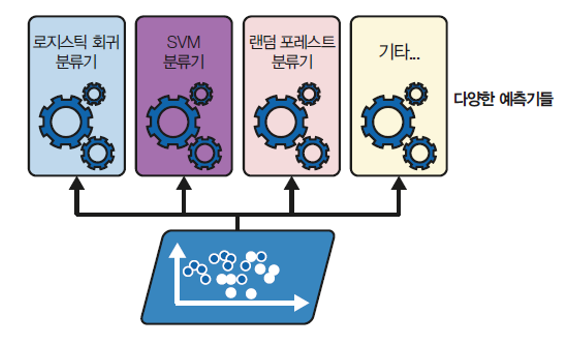

데이터셋

In [33]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
x,y = make_moons(n_samples=100, noise=0.1,random_state=42)
df = pd.DataFrame(x,columns=['x','y'])
df['class'] = y
df.head()

,x,y,class
0,1.582023,-0.445815,1
1,0.066045,0.439207,1
2,0.736631,-0.398963,1
3,-1.056928,0.242456,0
4,-0.802162,0.202718,0


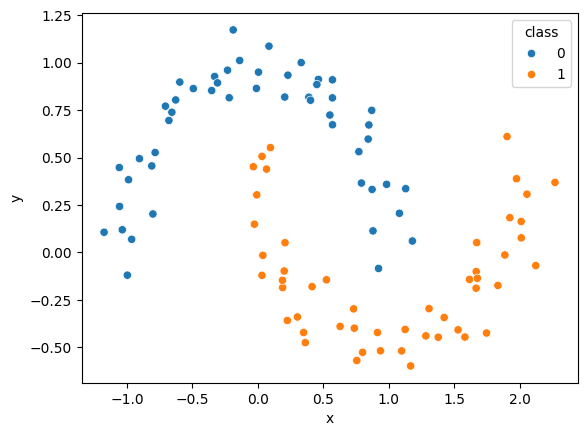

In [34]:
sns.scatterplot(data=df,x='x',y='y',hue='class')
plt.show()

투표기반의 분류기

In [35]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y, random_state=42)

voting = VotingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('rf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(random_state=42))
    ]
)
# 학습
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

각 분류기의 정확도를 확인

In [38]:
for name, model in voting.named_estimators_.items():
    print(f"{name} : {model.score(x_test,y_test)}")

lr : 0.88
rf : 1.0
svc : 1.0


- 직접 투표 진행(Hard voting)
    - voting 라이브러리 내에서 각 모델이 출력한(0,1) 값중에 투표

In [48]:
print(voting.predict(x_test))  # voting이 투표한결과
# 확인
[ model.predict(x_test) for model in  voting.estimators_]


[1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1]


[array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1]),
 array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1]),
 array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1])]

성능테스트

In [49]:
voting.score(x_test,y_test)

1.0

- 간접투표 방식(Soft Voting)
    - 모든 분류기가 클래스의 확률을 예측할 수 있으면(predict_proba()) 개별 분류기의  예측을 평균내어서 확률이 가장높은 클래스를 예측

In [50]:
voting.voting = 'soft'
voting.named_estimators['svc'].probability = True  # svc 클래스의 예측값을 출력해주는 옵션
voting.fit(x_train,y_train)  # 각 학습기의 predcit_proba를 실행하고 그 예측값의 평균 또는 투표를통해서 선정
voting.score(x_test,y_test)

1.0

- 실습
 - 분류문제 데이터를 가져와서 voting을 적용해 본다
 - https://archive.ics.uci.edu/dataset/73/mushroom

In [195]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 

앙상블 VS 일반모델

In [196]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


데이터 탐색

In [197]:
X.isna().mean()

cap-shape                   0.000000
cap-surface                 0.000000
cap-color                   0.000000
bruises                     0.000000
odor                        0.000000
gill-attachment             0.000000
gill-spacing                0.000000
gill-size                   0.000000
gill-color                  0.000000
stalk-shape                 0.000000
stalk-root                  0.305268
stalk-surface-above-ring    0.000000
stalk-surface-below-ring    0.000000
stalk-color-above-ring      0.000000
stalk-color-below-ring      0.000000
veil-type                   0.000000
veil-color                  0.000000
ring-number                 0.000000
ring-type                   0.000000
spore-print-color           0.000000
population                  0.000000
habitat                     0.000000
dtype: float64

In [198]:
pd.options.display.max_columns = None

In [199]:
X[X.isna().any(axis=1)]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,x,y,b,t,n,f,c,b,e,e,NaN,s,s,e,w,p,w,t,e,w,c,w
4023,x,y,e,f,y,f,c,n,b,t,NaN,k,s,w,w,p,w,o,e,w,v,p
4076,f,y,u,f,n,f,c,n,h,e,NaN,s,f,w,w,p,w,o,f,h,y,d
4100,x,y,e,f,y,f,c,n,b,t,NaN,k,s,p,p,p,w,o,e,w,v,d
4104,x,y,n,f,f,f,c,n,b,t,NaN,s,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,NaN,s,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,NaN,s,k,w,w,p,w,o,e,w,v,l


In [200]:
X.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [201]:
# stalk-root  : stalk 로 시작하는 관련 컬럼과의 연계성을 파악

In [202]:
# 결측치 시각화
!pip install missingno

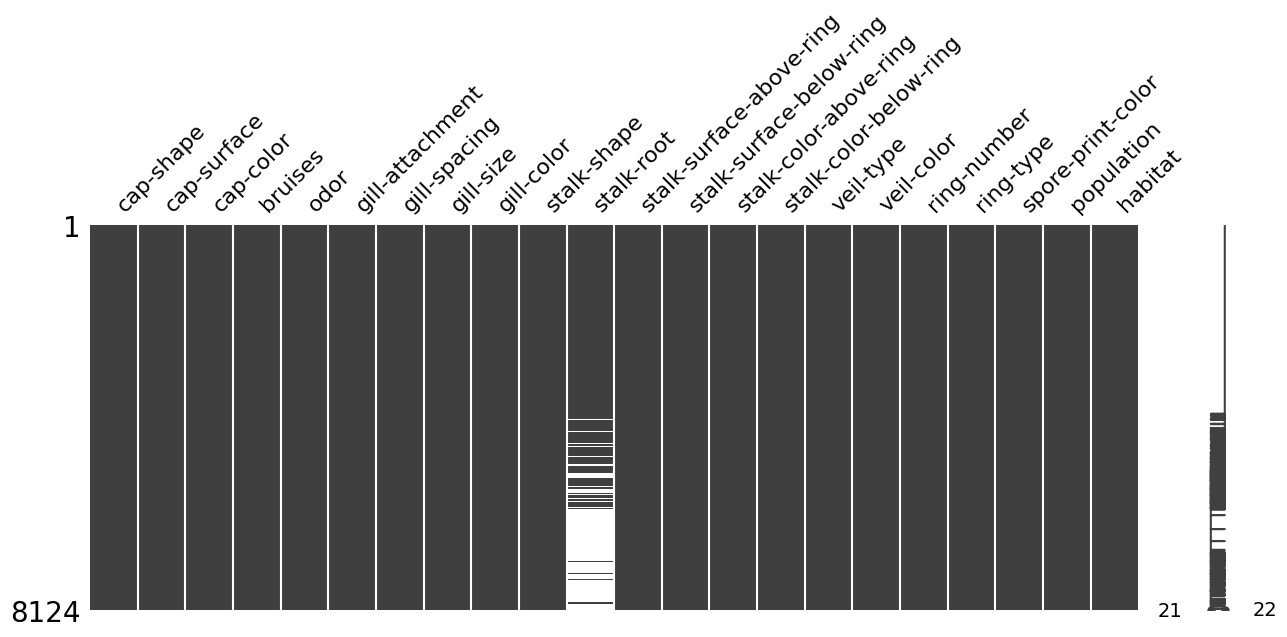

In [203]:
import missingno as msno
msno.matrix(X,figsize=(15,5))
plt.show()

결측치를 예측하는 모델을 만들어서 채움

In [204]:
from sklearn.ensemble import RandomForestClassifier
na_model = RandomForestClassifier()

In [208]:
# 인코딩
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

na_x = X.drop('stalk-root',axis=1)
na_y = X['stalk-root']

for col in na_x.columns:
    na_x[col] = oe.fit_transform(na_x[[col]])
na_y = oe.fit_transform( na_y.values.reshape(-1,1))


# 결측치가 없는 데이터로 학습
na_index = X[X['stalk-root'].notnull()].index
x_train =  na_x.iloc[na_index]
y_train = na_y[na_index]

#  학습
na_model.fit(x_train, y_train)

c:\Users\USER\miniconda3\envs\20240909\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [209]:
# 결측치가있는 데이터로 예측
na_index = X[X['stalk-root'].isna()].index
x_test =  na_x.iloc[na_index]
preds = na_model.predict(x_test)

In [232]:
na_y[na_index] = preds.reshape(-1,1)

In [236]:
len(na_y), len(na_x)
na_x['stalk-root'] = na_y

In [239]:
# 데이터 분할
x_train,x_test, y_train, y_test = train_test_split(na_x,y,stratify=y, random_state=42)
# 랜덤포레스트
model1 = RandomForestClassifier()
model1.fit(x_train, y_train)
model1.score(x_test,y_test)

1.0

In [243]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model1.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1052
           1       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

